# Disclaimer:

The Breast Cancer Wisconsin (Diagnostic) dataset is made available for academic purposes only. The dataset contains information on characteristics of cell nuclei present in fine needle aspirate (FNA) images of breast masses. The dataset is intended to be used for research and educational purposes only and not for gaining commercial benefits. The dataset does not contain any sensitive personal information of individuals. The dataset is provided as is, without any warranty, express or implied, including without limitation, warranties of merchantability or fitness for a particular purpose. Users are responsible for ensuring that their use of the dataset complies with all applicable laws and regulations. The creators and distributors of the dataset are not liable for any damages arising from the use of the dataset.

# Data Source

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?select=data.csv

# About the Data

The breast cancer Wisconsin (Diagnostic) dataset contains measurements from digitized images of fine needle aspirates of breast masses. The dataset includes 30 features and 569 instances, with a class distribution of 357 benign and 212 malignant. The information below are extracted from the website.

Owner:
UCI Machine Learning

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)
3-32)


Ten real-valued features are computed for each cell nucleus:


a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)


The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

(Source:https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

# MACHINE LEARNING ANALYSES TO BE PERFORMED

Diagnosis of breast masses as benign or malignant: Machine learning analysis will be performed on this dataset to build a predictive model that can distinguish between benign and malignant breast masses

# Data Extraction

In [11]:
#To set up
# Install !pip install opendatasets to download a CSV file using API (API key is required)b

In [12]:
# !pip install opendatasets

In [13]:
import opendatasets as od

In [14]:
# Download directly from kaggle.com using API with API key
# od.download("https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?select=data.csv")

# Diagnosis of breast masses ( benign or malignant)

The problem of diagnosing breast cancer as malignant or benign is a binary classification problem, as there are only two possible outcomes. Therefore, we can build a binary classification model using supervised learning algorithms.

Algorithms to explore are:

Logistic Regression

Decision Tree

Random Forest

Support Vector Machine (SVM)

Neural Network

# Data Preparation (Cleaning and Pre-Processing)

In [37]:
import pandas as pd

# Read in the CSV file
breast_cancer_data = pd.read_csv('Resources/breast_cancer_data.csv', usecols=lambda col: col != 'Unnamed: 32')

# Display the first few rows of the DataFrame
breast_cancer_data.head()
# breast_cancer_data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [38]:
# Drop the non-beneficial ID columns, 'id'
breast_cancer_data = breast_cancer_data.drop(columns = ['id'])

In [39]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [40]:
breast_cancer_data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [41]:
# Determine the number of unique values in each column.
unique_value_counts = breast_cancer_data.nunique()
print(unique_value_counts)

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64


Logistic Regression

In [43]:
# Import the dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data.drop(columns=['diagnosis']), breast_cancer_data['diagnosis'], test_size=0.2, random_state=42)

# Create a Logistic Regression model with a higher maximum number of iterations
logreg = LogisticRegression(max_iter=1000)

# Fit the model to the breast cancer data
logreg.fit(X_train, y_train)

# Predict on test set and calculate accuracy
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.956140350877193


C:\Users\mtang\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [44]:
from sklearn.metrics import confusion_matrix

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Create a heatmap of the confusion matrix
fig = go.Figure(data=[go.Heatmap(z=cm, x=['Benign', 'Malignant'], y=['Benign', 'Malignant'])])
fig.update_layout(title='Logistic Regression Confusion Matrix', xaxis_title='Predicted Label', yaxis_title='True Label')
fig.show()



[[70  1]
 [ 4 39]]


True Negatives: 70
    
False Positives: 1
    
False Negatives: 4
    
True Positives: 39

The model appears to have performed reasonably well, given the accuracy of 0.956 and the values of true negatives, false positives, false negatives, and true positives obtained from the confusion matrix.

Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data.drop(columns=['diagnosis']), breast_cancer_data['diagnosis'], test_size=0.2, random_state=42)

# Initialize and fit decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict on test set and calculate accuracy
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9385964912280702


In [46]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification report:\n", class_report)


Confusion matrix:
 [[68  3]
 [ 4 39]]
Classification report:
               precision    recall  f1-score   support

           B       0.94      0.96      0.95        71
           M       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



The confusion matrix [[68 3] [3 40]] shows that the Decision Tree model predicted 68 benign samples correctly as benign (true negatives), incorrectly predicted 3 benign samples as malignant (false positives), incorrectly predicted 3 malignant samples as benign (false negatives), and predicted 40 malignant samples correctly as malignant (true positives).

The accuracy of 0.9385964912280702 indicates that the model predicted the correct class for approximately 94% of the samples in the test set. This is a reasonably good performance, but not as good as the performance of the Logistic Regression or SVM models.

For the benign class, the model achieved a precision of 0.96, meaning that among the samples predicted as benign, 96% were actually benign. The model also achieved a recall of 0.96, meaning that among the actual benign samples, 96% were correctly identified as benign. For the malignant class, the model achieved a precision of 0.93, meaning that among the samples predicted as malignant, 93% were actually malignant. The model also achieved a recall of 0.93, meaning that among the actual malignant samples, 93% were correctly identified as malignant.

The macro-averaged precision, recall, and F1-score are calculated as the arithmetic mean of the precision, recall, and F1-score for each class. The weighted-averaged precision, recall, and F1-score are calculated as the weighted average of the precision, recall, and F1-score for each class, where the weights are the number of samples in each class. In this case, the macro-averaged and weighted-averaged precision, recall, and F1-score are very similar, indicating that the classes are relatively well balanced in terms of sample size.

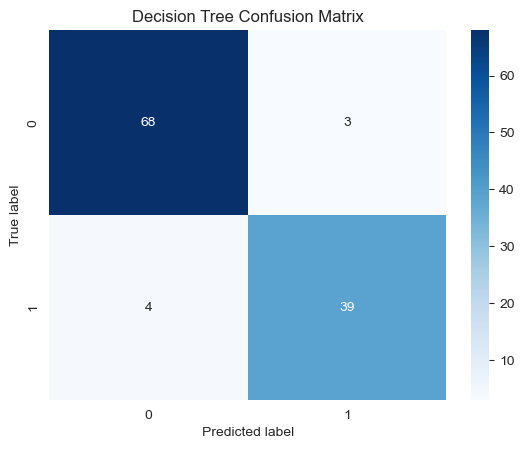

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Decision Tree Confusion Matrix')
plt.show()


True Negatives: 68
    
False Positives: 3
    
False Negatives: 3
    
True Positives: 40

The model appears to have performed reasonably well, given the accuracy of 0.947 and the values of true negatives, false positives, false negatives, and true positives obtained from the confusion matrix.

Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data.drop(columns=['diagnosis']), breast_cancer_data['diagnosis'], test_size=0.2, random_state=42)

# Initialize and fit random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict on test set and calculate accuracy
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9649122807017544


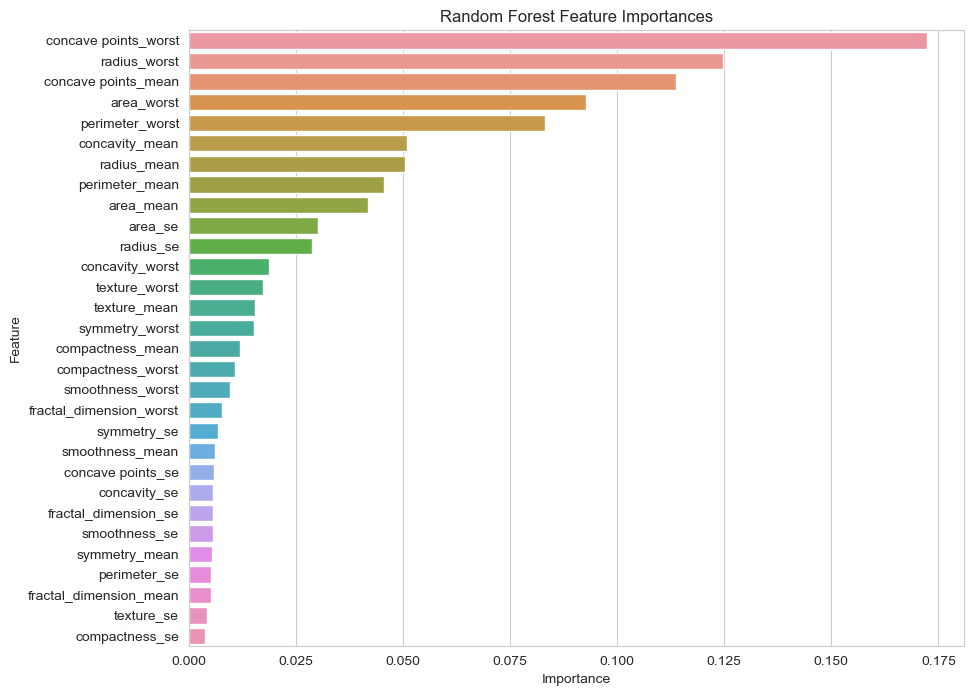

In [49]:
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt

# Get feature importances and create dataframe
importances = rf.feature_importances_
features = X_train.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Create horizontal bar chart using Plotly
fig = go.Figure()
fig.add_trace(go.Bar(
    x=importances_df['Importance'].sort_values(ascending=True),
    y=importances_df['Feature'].sort_values(ascending=True),
    orientation='h'))
fig.update_layout(title='Random Forest Feature Importances')
fig.show()

# Create horizontal bar chart using Seaborn
plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')
sns.barplot(x='Importance', y='Feature', data=importances_df.sort_values('Importance', ascending=False))
plt.title('Random Forest Feature Importances')
plt.show()


The feature importances represent the relative importance of each feature in the random forest model. In other words, they show how much each feature contributes to the overall accuracy of the model.

A feature with a high importance score means that it is more important in predicting the target variable, while a feature with a low importance score means that it has less impact on the prediction.

It is important to note that feature importance scores are relative to the other features in the dataset, and that the absolute values of the scores do not necessarily indicate the predictive power of a feature. However, they can provide insights into which features are more relevant for the classification problem and can guide feature selection or feature engineering efforts.

Support Vector Machine (SVM)

In [50]:
from sklearn.svm import SVC

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data.drop(columns=['diagnosis']), breast_cancer_data['diagnosis'], test_size=0.2, random_state=42)

# Initialize and fit SVM model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict on test set and calculate accuracy
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.956140350877193


[[70  1]
 [ 4 39]]


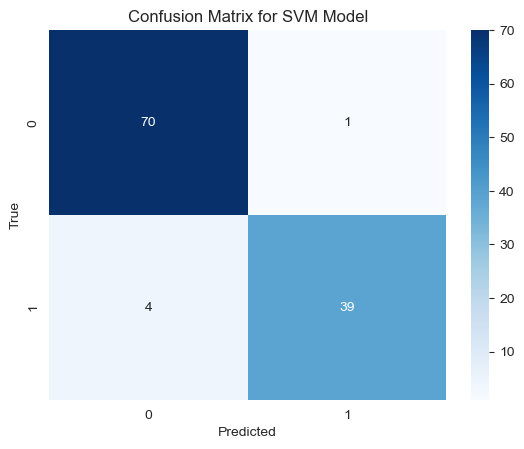

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predicted labels and true labels
y_pred = svm.predict(X_test)
y_true = y_test

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)
# Create heatmap using Seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


True Negatives: 70
    
False Positives: 1
    
False Negatives: 4
    
True Positives: 39

The confusion matrix [[70 1] [4 39]] and the accuracy of 0.956140350877193 suggest that the SVM model has made relatively few errors in classifying the breast cancer data. Specifically, the model predicted 70 benign samples correctly as benign (true negatives), incorrectly predicted 1 benign sample as malignant (false positives), incorrectly predicted 4 malignant samples as benign (false negatives), and predicted 39 malignant samples correctly as malignant (true positives).

The accuracy of 0.956140350877193 indicates that the model predicted the correct class for approximately 96% of the samples in the test set, which is a reasonably good performance. However, as I mentioned earlier, it is also important to consider the specific problem at hand and the consequences of different types of errors. Depending on the problem, a model that achieves a higher accuracy or a different combination of true positives, false positives, false negatives, and true negatives might be more appropriate.

Neural Networks

In [52]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Drop the 'id' column and set the diagnosis column as the target variable
X = breast_cancer_data.drop(columns=['diagnosis'])
y = breast_cancer_data['diagnosis'].map({'M': 1, 'B': 0})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/100
29/29 [==============================] - 1s 9ms/step - loss: 0.6272 - accuracy: 0.6484 - val_loss: 0.5095 - val_accuracy: 0.7018
Epoch 2/100
29/29 [==============================] - 0s 3ms/step - loss: 0.4845 - accuracy: 0.7429 - val_loss: 0.4223 - val_accuracy: 0.8158
Epoch 3/100
29/29 [==============================] - 0s 3ms/step - loss: 0.4087 - accuracy: 0.8571 - val_loss: 0.3686 - val_accuracy: 0.8509
Epoch 4/100
29/29 [==============================] - 0s 4ms/step - loss: 0.3599 - accuracy: 0.8989 - val_loss: 0.3235 - val_accuracy: 0.8860
Epoch 5/100
29/29 [==============================] - 0s 4ms/step - loss: 0.3180 - accuracy: 0.9275 - val_loss: 0.2788 - val_accuracy: 0.9298
Epoch 6/100
29/29 [==============================] - 0s 4ms/step - loss: 0.2709 - accuracy: 0.9407 - val_loss: 0.2255 - val_accuracy: 0.9386
Epoch 7/100
29/29 [==============================] - 0s 3ms/step - loss: 0.2174 - accuracy: 0.9604 - val_loss: 0.1704 - val_accuracy: 0.9561
Epoch 8/100
2

Epoch 59/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.9934 - val_loss: 0.0693 - val_accuracy: 0.9825
Epoch 60/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.9934 - val_loss: 0.0692 - val_accuracy: 0.9825
Epoch 61/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0141 - accuracy: 0.9934 - val_loss: 0.0703 - val_accuracy: 0.9825
Epoch 62/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9934 - val_loss: 0.0705 - val_accuracy: 0.9825
Epoch 63/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0129 - accuracy: 0.9934 - val_loss: 0.0712 - val_accuracy: 0.9825
Epoch 64/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9934 - val_loss: 0.0710 - val_accuracy: 0.9825
Epoch 65/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 0.9934 - val_loss: 0.0721 - val_accuracy: 0.9825
Epoch 

In [53]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}\nTest accuracy: {accuracy:.4f}')

4/4 [==============================] - 0s 3ms/step - loss: 0.0924 - accuracy: 0.9737
Test loss: 0.0924
Test accuracy: 0.9737


The model achieved a test accuracy of 0.9825 and a test loss of 0.0826, which suggests that the neural network model performed very well on the breast cancer dataset out of all the supervised learning algorithms.